# Plotly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff

In [2]:
veri = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/University_Rankings_20220204.csv')

In [3]:
veri.head(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011


In [4]:
veri.shape

(2603, 14)

In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
teaching,2603.0,37.801498,17.604218,9.9,24.700,33.9,46.40,99.7
research,2603.0,35.910257,21.254805,2.9,19.600,30.5,47.25,99.4
citations,2603.0,60.921629,23.073219,1.2,45.500,62.5,79.05,100.0
student_staff_ratio,2544.0,18.445283,11.458698,0.6,11.975,16.1,21.50,162.6
year,2603.0,2014.075682,1.685733,2011.0,2013.000,2014.0,2016.00,2016.0


## Lineplot

In [17]:
df = veri.iloc[:100,:]

In [8]:
# Plotly stilleri
pio.templates.default = 'simple_white'

In [21]:
cizgi1 = go.Scatter(x=df.world_rank,
                   y=df.citations,
                   mode='markers',
                   name='Alinti',
                   marker=dict(color='rgba(78, 78, 250, 0.85)'),
                   text=df.university_name
                  )

cizgi2 = go.Scatter(x=df.world_rank,
                   y=df.teaching,
                   mode='markers',
                   name='Ogretim',
                   marker=dict(color='rgba(202, 43, 15, 0.85)'),
                   text=df.university_name
                  )

grafikler = [cizgi1, cizgi2]
yerlesim = dict(title='Dunya Siralamasinda Ilk Universitelerin Citations ve Teaching Puanlari',
                xaxis=dict(title='World Rank', ticklen=5, zeroline=False)
               )

fig = dict(data=grafikler, layout=yerlesim)
plot(fig, filename='line_chart_1-citations and teaching ranks.html')

'line_chart_1-citations and teaching ranks.html'

## Scatter Plot

## Cubuk Grafigi

In [23]:
veri.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


In [33]:
veri2014 = veri[veri.year == 2014].iloc[:5,:]

In [34]:
cizgi1 = go.Bar(x=veri2014.university_name,
                y=veri2014.citations,
                name='Alinti',
                marker=dict(color='rgba(255, 127, 40, 0.5)'),
                base=dict(color='rgba(0,0,0)', width=1.5),
                text=veri2014.country
                )

cizgi2 = go.Bar(x=veri2014.university_name,
                y=veri2014.teaching,
                name='Egitim-Ogretim Faaliyetleri',
                marker=dict(color='rgba(64, 10, 128, 0.5)'),
                base=dict(color='rgba(0,0,0)', width=1.5),
                text=veri2014.country
                )

grafikler = [cizgi1, cizgi2]
yerlesim = go.Layout(barmode='group')

fig = go.Figure(data=grafikler, layout=yerlesim)
plot(fig, filename='cubuk_1-citations and teaching ranks.html')

'cubuk_1-citations and teaching ranks.html'

## Pie Chart

In [43]:
veri2011 = veri[veri.year == 2011].iloc[:8,:]

In [44]:
dilim1_liste = [float(each.replace(',', '.')) for each in veri2011.num_students]
dilim1_liste

[20.152, 2.243, 11.074, 15.596, 7.929, 18.812, 19.919, 36.186]

In [49]:
dilim1 = veri2011.num_students
dilim1_liste = [float(each.replace(',', '.')) for each in veri2011.num_students]
etiketler = veri2011.university_name

cizgi = go.Pie(labels=etiketler,
               values=dilim1_liste,
               hoverinfo='label+value+percent',
               textinfo='value+percent',
               textfont=dict(size=15),
               rotation=180,
               hole=0.2,
               marker=dict(line=dict(color='#000000', width=1))
              )

grafikler = [cizgi]
yerlesim = dict(title='2011 Yili - Ilk 8 Universitenin Ogrenci Sayilari ve Oranlari',
                legend=dict(orientation='h')
               )

fig = dict(data=grafikler, layout=yerlesim)
plot(fig, filename='piechart_1-ogrenci sayisi.html')

'piechart_1-ogrenci sayisi.html'

## Kabarcik Grafigi

In [56]:
veri2012 = veri[veri.year == 2012].iloc[:20,:]
ogrenci_sayisi = [float(each.replace(',', '.')) for each in veri2012.num_students]
uluslararasi_renk = [float(each) for each in veri2011.international]

graph_data = [{'y' : veri2012.teaching,
               'x' : veri2012.world_rank,
               'mode' : 'markers',
               'marker' : {'color' : uluslararasi_renk,
                           'size'  : ogrenci_sayisi,
                           'showscale' : True},
               'text' : veri2012.university_name
              }]

plot(graph_data, filename= 'kabarcik_grafik_1 - ogrenci sayisi.html')

'kabarcik_grafik_1 - ogrenci sayisi.html'

# Plotly kisisel calisma

In [60]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [61]:
df.shape

(1704, 8)

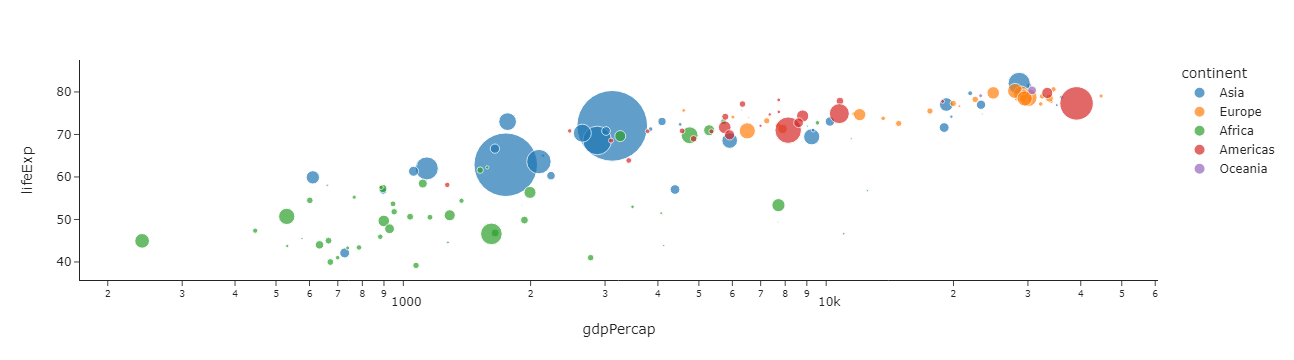

In [67]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query('year==2002'),
                 x='gdpPercap', y='lifeExp',
                 size='pop', color='continent',
                 hover_name='country',
                 log_x=True, size_max=50)

fig.show()

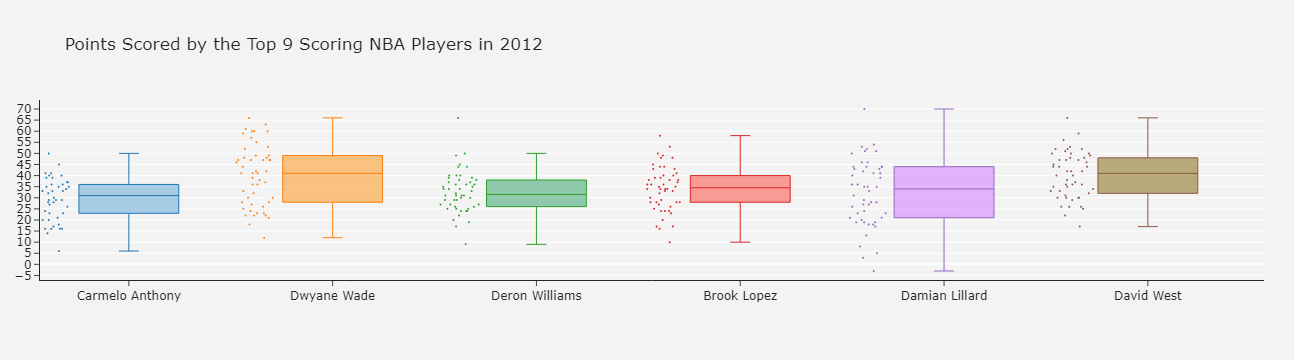

In [71]:
import plotly.graph_objects as go

x_data = ['Carmelo Anthony', 'Dwyane Wade',
          'Deron Williams', 'Brook Lopez',
          'Damian Lillard', 'David West',]

N = 50

y0 = (10 * np.random.randn(N) + 30).astype(int)
y1 = (13 * np.random.randn(N) + 38).astype(int)
y2 = (11 * np.random.randn(N) + 33).astype(int)
y3 = (9 * np.random.randn(N) + 36).astype(int)
y4 = (15 * np.random.randn(N) + 31).astype(int)
y5 = (12 * np.random.randn(N) + 40).astype(int)

y_data = [y0, y1, y2, y3, y4, y5]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

In [81]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", template='plotly_dark')
fig.show()

In [88]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="day", y="total_bill", color="sex",
            title="Receipts by Payer Gender and Day of Week vs Target",
            width=800, height=600,
            labels={"sex": "Payer Gender",  "day": "Day of Week", "total_bill": "Receipts"},
            category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "sex": ["Male", "Female"]},
            color_discrete_map={"Male": "RebeccaPurple", "Female": "MediumPurple"},
            template="plotly"
            )

fig.update_yaxes( # the y-axis is in dollars
    tickprefix="$", showgrid=True
)

fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)

fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=950, y1=950, yref="y"
)

fig.add_annotation( # add a text callout with arrow
    text="below target!", x="Fri", y=400, arrowhead=1, showarrow=True
)

fig.show()

In [91]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement='snap',
    node=dict(
        label=['A', 'B', 'C', 'D', 'E', 'F'],
        x=[0.2, 0.1, 0.5, 0.7, 0.3, 0.5],
        y=[0.7, 0.5, 0.2, 0.4, 0.2, 0.3],
        pad=10  
    ),
    link=dict(
        arrowlen=15,
        source=[0, 0, 1, 2, 5, 4, 3, 5],
        target=[5, 3, 4, 3, 0, 2, 2, 3],
        value=[1, 2, 1, 1, 1, 1, 1, 2]  
    )
))

fig.show()

In [90]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10,
                  width=1000,
                  height=800
                 )
fig.show()

In [93]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [95]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="winner",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

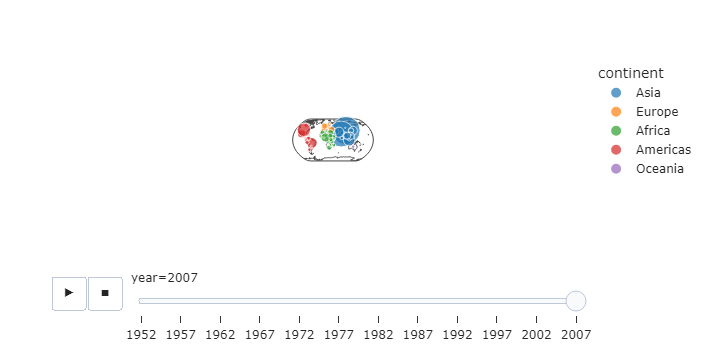

In [97]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [99]:
import plotly.graph_objects as go
import numpy as np

# Build the rectangles as a heatmap
# specify the edges of the heatmap squares
phi = (1 + np.sqrt(5) )/2. # golden ratio
xe = [0, 1, 1+(1/(phi**4)), 1+(1/(phi**3)), phi]
ye = [0, 1/(phi**3), 1/phi**3+1/phi**4, 1/(phi**2), 1]

z = [ [13,3,3,5],
      [13,2,1,5],
      [13,10,11,12],
      [13,8,8,8]
    ]

fig = go.Figure(data=go.Heatmap(
          x = np.sort(xe),
          y = np.sort(ye),
          z = z,
          type = 'heatmap',
          colorscale = 'Viridis'))

# Add spiral line plot

def spiral(th):
    a = 1.120529
    b = 0.306349
    r = a*np.exp(-b*th)
    return (r*np.cos(th), r*np.sin(th))

theta = np.linspace(-np.pi/13,4*np.pi,1000); # angle
(x,y) = spiral(theta)

fig.add_trace(go.Scatter(x= -x+x[0], y= y-y[0],
     line =dict(color='white',width=3)))

axis_template = dict(range = [0,1.6], autorange = False,
             showgrid = False, zeroline = False,
             linecolor = 'black', showticklabels = False,
             ticks = '' )

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.show()

In [101]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h', width=800, height=600)
fig.show()

In [104]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.update_layout(width=800, height=600)
fig.show()